In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
%cd ~/Covid19-LUS/Combined

/home/g007markphillip/Covid19-LUS/Combined


In [3]:
!ls

 A-lines			 'b-lines, effusion'	     training
 B-lines,Consolidation,Effusion  'effusion, consolidation'   training_attn
 Consolidations			  logs			     training_new
 Effusion			  logs_attn		     training_new1
 b-lines			  logs_new
'b-lines, consolidation'	  logs_new1


In [4]:
data = dict()
data['image_name'] = []
data['labels'] = []
data['image_path'] = []

for label in os.listdir():
    for image in os.listdir(label):
        data['image_name'].append(image)

    for _ in range(len(os.listdir(label))):
        data['labels'].append(label)

    for path in os.listdir(label):
        data['image_path'].append(label+'/'+path)

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,image_name,labels,image_path
0,train,logs,logs/train
1,Pneu_consol_advancesVid10.mp4_frame252.jpg,Consolidations,Consolidations/Pneu_consol_advancesVid10.mp4_f...
2,Pneu_AIR BRONC2.mp4_frame16.jpg,Consolidations,Consolidations/Pneu_AIR BRONC2.mp4_frame16.jpg
3,69_pocusatlas_pneumonia_prc_convex_clean_frame...,Consolidations,Consolidations/69_pocusatlas_pneumonia_prc_con...
4,Pneu-Atlas-pneumonia2.gif_frame36.jpg,Consolidations,Consolidations/Pneu-Atlas-pneumonia2.gif_frame...
...,...,...,...
1546,train_,logs_attn,logs_attn/train_
1547,train,logs_attn,logs_attn/train
1548,cp.ckpt.index,training_new,training_new/cp.ckpt.index
1549,checkpoint,training_new,training_new/checkpoint


In [7]:
def rename_labels1(label):
    if '-' in label:
        label=label.replace('-','')
    if '_' in label:
        label=label.replace('_','')
    if ' ' in label:
        label = label.replace(' ','')

    return label.lower()

def rename_labels2(label):
    if 'ablines' in label:
        label =label.replace('ablines','alines,blines')
    if 'a,blines' in label:
        label =label.replace('a,blines','alines,blines')
    if 'consolidations' in label:
        label = label.replace('consolidations','consolidation')
    
    return label


def combine_f(label):
    x = rename_labels1(label)
    x = rename_labels2(x)
    x =  x.split(',')
    return x

In [8]:
df['pre_labels']=df.labels.apply(combine_f)

In [9]:
mlb = MultiLabelBinarizer()
binarized = mlb.fit_transform(df.pre_labels)

In [10]:
df[mlb.classes_] = binarized

In [11]:
df[df['blines']==1].drop(['consolidation','effusion'],axis=1)

,image_name,labels,image_path,pre_labels,alines,blines,logs,logsattn,logsnew,logsnew1,training,trainingattn,trainingnew,trainingnew1
336,Pneu-Atlas-pneumonia.gif_frame24.jpg,"B-lines,Consolidation,Effusion","B-lines,Consolidation,Effusion/Pneu-Atlas-pneu...","[blines, consolidation, effusion]",0,1,0,0,0,0,0,0,0,0
337,Pneu-Atlas-pneumonia.gif_frame12.jpg,"B-lines,Consolidation,Effusion","B-lines,Consolidation,Effusion/Pneu-Atlas-pneu...","[blines, consolidation, effusion]",0,1,0,0,0,0,0,0,0,0
338,Pneu-Atlas-pneumonia.gif_frame42.jpg,"B-lines,Consolidation,Effusion","B-lines,Consolidation,Effusion/Pneu-Atlas-pneu...","[blines, consolidation, effusion]",0,1,0,0,0,0,0,0,0,0
339,Pneu-Atlas-pneumonia.gif_frame18.jpg,"B-lines,Consolidation,Effusion","B-lines,Consolidation,Effusion/Pneu-Atlas-pneu...","[blines, consolidation, effusion]",0,1,0,0,0,0,0,0,0,0
340,Pneu-Atlas-pneumonia.gif_frame45.jpg,"B-lines,Consolidation,Effusion","B-lines,Consolidation,Effusion/Pneu-Atlas-pneu...","[blines, consolidation, effusion]",0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,Pneu_liftl_pneu_case3_clip5.mp4_frame5.jpg,"b-lines, consolidation","b-lines, consolidation/Pneu_liftl_pneu_case3_c...","[blines, consolidation]",0,1,0,0,0,0,0,0,0,0
1398,Cov_wfumb_case_dez.mp4_frame90.jpg,"b-lines, consolidation","b-lines, consolidation/Cov_wfumb_case_dez.mp4_...","[blines, consolidation]",0,1,0,0,0,0,0,0,0,0
1399,Pneu_liftl_pneu_case3_clip3.mp4_frame10.jpg,"b-lines, consolidation","b-lines, consolidation/Pneu_liftl_pneu_case3_c...","[blines, consolidation]",0,1,0,0,0,0,0,0,0,0
1400,Cov-grep-7507.mp4_frame150.jpg,"b-lines, consolidation","b-lines, consolidation/Cov-grep-7507.mp4_frame...","[blines, consolidation]",0,1,0,0,0,0,0,0,0,0


In [12]:
df[df['alines']==1].drop(['consolidation','effusion'],axis=1)

,image_name,labels,image_path,pre_labels,alines,blines,logs,logsattn,logsnew,logsnew1,training,trainingattn,trainingnew,trainingnew1
1021,Reg_pat2Image_134348.mpeg_frame168.jpg,A-lines,A-lines/Reg_pat2Image_134348.mpeg_frame168.jpg,[alines],1,0,0,0,0,0,0,0,0,0
1022,96_litfl_other_linear_frame28.jpg,A-lines,A-lines/96_litfl_other_linear_frame28.jpg,[alines],1,0,0,0,0,0,0,0,0,0
1023,144_litfl_other_prc_linear_clean_frame21.jpg,A-lines,A-lines/144_litfl_other_prc_linear_clean_frame...,[alines],1,0,0,0,0,0,0,0,0,0
1024,142_litfl_other_prc_linear_clean_frame0.jpg,A-lines,A-lines/142_litfl_other_prc_linear_clean_frame...,[alines],1,0,0,0,0,0,0,0,0,0
1025,143_litfl_other_prc_linear_clean_frame18.jpg,A-lines,A-lines/143_litfl_other_prc_linear_clean_frame...,[alines],1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,Reg_pat2Image_134348.mpeg_frame56.jpg,A-lines,A-lines/Reg_pat2Image_134348.mpeg_frame56.jpg,[alines],1,0,0,0,0,0,0,0,0,0
1357,96_litfl_other_linear_frame21.jpg,A-lines,A-lines/96_litfl_other_linear_frame21.jpg,[alines],1,0,0,0,0,0,0,0,0,0
1358,39_grepmed_normal_prc_linear_clean_frame78.jpg,A-lines,A-lines/39_grepmed_normal_prc_linear_clean_fra...,[alines],1,0,0,0,0,0,0,0,0,0
1359,Reg_pat4Image_140434.mpeg_frame200.jpg,A-lines,A-lines/Reg_pat4Image_140434.mpeg_frame200.jpg,[alines],1,0,0,0,0,0,0,0,0,0


In [13]:
import sklearn
dataframe=pd.concat([df[df['blines']==1].drop(['consolidation','effusion'],axis=1),
          df[df['alines']==1].drop(['consolidation','effusion'],axis=1)
])
dataframe = sklearn.utils.shuffle(dataframe)

In [14]:
dataframe

,image_name,labels,image_path,pre_labels,alines,blines,logs,logsattn,logsnew,logsnew1,training,trainingattn,trainingnew,trainingnew1
951,Cov_convex_volpecelli_sonographic_v5.mov_frame...,b-lines,b-lines/Cov_convex_volpecelli_sonographic_v5.m...,[blines],0,1,0,0,0,0,0,0,0,0
984,159_core_other_prc_convex_clean_frame0.jpg,b-lines,b-lines/159_core_other_prc_convex_clean_frame0...,[blines],0,1,0,0,0,0,0,0,0,0
696,Cov-grepmed-blines-pocus-.mp4_frame133.jpg,b-lines,b-lines/Cov-grepmed-blines-pocus-.mp4_frame133...,[blines],0,1,0,0,0,0,0,0,0,0
340,Pneu-Atlas-pneumonia.gif_frame45.jpg,"B-lines,Consolidation,Effusion","B-lines,Consolidation,Effusion/Pneu-Atlas-pneu...","[blines, consolidation, effusion]",0,1,0,0,0,0,0,0,0,0
716,Cov_convex_volpecelli_sonographic_v5.mov_frame...,b-lines,b-lines/Cov_convex_volpecelli_sonographic_v5.m...,[blines],0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,108_litfl_other_prc_convex_clean_frame21.jpg,A-lines,A-lines/108_litfl_other_prc_convex_clean_frame...,[alines],1,0,0,0,0,0,0,0,0,0
923,54_pocusatlas_covid_prc_convex_clean_frame6.jpg,b-lines,b-lines/54_pocusatlas_covid_prc_convex_clean_f...,[blines],0,1,0,0,0,0,0,0,0,0
1001,Cov_emdocs_vid1.gif_frame133.jpg,b-lines,b-lines/Cov_emdocs_vid1.gif_frame133.jpg,[blines],0,1,0,0,0,0,0,0,0,0
1065,108_litfl_other_prc_convex_clean_frame35.jpg,A-lines,A-lines/108_litfl_other_prc_convex_clean_frame...,[alines],1,0,0,0,0,0,0,0,0,0


In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf
from  tensorflow_addons.layers import SpectralNormalization as sn
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import clear_output
from tensorflow.keras.layers import *

2022-02-15 09:35:10.157426: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/home/g007markphillip/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [16]:
num_epochs = 10  # train for 400 epochs for good results
image_size = 128
# resolution of Kernel Inception Distance measurement, see related section
padding = 0.25

# adaptive discriminator augmentation
max_translation = 0.125
max_rotation = 0.125
max_zoom = 0.25
target_accuracy = 0.85
integration_steps = 1000

# architecture
noise_size = 64
depth = 4
width = 64
leaky_relu_slope = 0.2
dropout_rate = 0.4


learning_rate = 2e-4
beta_1 = 0.5  # not using the default value of 0.9 is important
ema = 0.99

In [17]:
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self):
        super(SelfAttention,self).__init__()
        
    def build(self,input_shape):
#         print(input_shape)
        self.n,self.h_,self.w,self.c = input_shape
        
        self.n_feats = self.h_*self.w
        self.f = Conv2D(self.c//8, 1, padding='same')
        
        self.g = Conv2D(self.c//8,1,padding='same')
        self.g_pool = MaxPooling2D(2,2)
        
        self.h = Conv2D(self.c//2,1,padding='same')
        self.h_pool = MaxPooling2D(2,2)
        
        self.attn = Conv2D(self.c,1,padding='same')
        self.sigma = tf.Variable(0.0,dtype=tf.float32,trainable=True)
        
    def call(self,x):
#         print(x.shape)
        
        f = self.f(x)
        f = tf.reshape(f,[-1,self.n_feats,f.shape[-1]])
#         print(f.shape)
        
        g = self.g(x)
        g = self.g_pool(g)
        g = tf.reshape(g,[-1,self.n_feats//4,g.shape[-1]])
#         print(g.shape)
        
        
        attn = tf.matmul(f,g, transpose_b=True)
        attn = tf.nn.softmax(attn)
#         print(tf.reduce_sum(attn, axis=-1))
        
        h = self.h(x)
        h = self.h_pool(h)
#         print(h.shape)
        h = tf.reshape(h,[-1,self.n_feats//4,h.shape[-1]])
        
        attn_2 = tf.matmul(attn, h)
#         print(attn_2.shape)
        
        attn_2 = tf.reshape(attn_2, [-1, self.h_, self.w, attn_2.shape[-1]])
        attn_2 = self.attn(attn_2)
        
        o = x+self.sigma*attn_2
        return o
        

In [18]:
# Conv2D(3,1)(tf.random.normal((1,64,64,5)))

In [19]:
# q = SelfAttention()

In [20]:
# q(tf.random.normal((1,64,64,5)))

In [21]:
def get_generator():
    g_width=128
    noise_input = keras.Input(shape=(noise_size,))
    x = layers.Dense(4 * 4 * width, use_bias=False)(noise_input)
    x = layers.BatchNormalization(scale=False)(x)
    x = layers.ReLU()(x)
    x = layers.Reshape(target_shape=(4, 4, width))(x)
    for _ in range(depth):
        x = sn(layers.Conv2DTranspose(
            width, kernel_size=4, strides=2, padding="same", use_bias=False,
        ))(x)
        x = layers.BatchNormalization(scale=False)(x)
        x = layers.ReLU()(x)
#     x = SelfAttention()(x)
#         g_width/=2
    image_output = sn(layers.Conv2DTranspose(
        3, kernel_size=4, strides=2, padding="same", activation="sigmoid",
    ))(x)

    return keras.Model(noise_input, image_output, name="generator")

In [22]:
def get_discriminator():
    image_input = keras.Input(shape=(image_size, image_size, 3))
    x = image_input
#     d_width=32
#     x = layers.Conv2D(
#             width, kernel_size=4, strides=2, padding="same", use_bias=False,
#         )(x)
#     x = SelfAttention()(x)
    for _ in range(depth+1):
        x = sn(layers.Conv2D(
            width, kernel_size=4, strides=2, padding="same", use_bias=False,
        ))(x)
        x = layers.BatchNormalization(scale=False)(x)
        x = layers.LeakyReLU(alpha=leaky_relu_slope)(x)
      
#     print(x)
#     
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)
    output_score = layers.Dense(1)(x)

    return keras.Model(image_input, output_score, name="discriminator")

In [23]:
get_generator().summary()

2022-02-15 09:35:14.078484: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-15 09:35:14.093075: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-15 09:35:17.030422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-15 09:35:17.031300: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-02-15 09:35:17.031351: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-15 09:35:17.132744: I tensorflow/stream_executor/platform/default/dso_lo

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              65536     
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              3072      
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 64)          0         
_________________________________________________________________
spectral_normalization (Spec (None, 8, 8, 64)          65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          19

In [24]:
get_discriminator().summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
spectral_normalization_5 (Sp (None, 64, 64, 64)        3136      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 64)        192       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 64)        0         
_________________________________________________________________
spectral_normalization_6 (Sp (None, 32, 32, 64)        65600     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        192       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)      

In [25]:
class GAN_ADA(keras.Model):
    def __init__(self):
        super().__init__()

        self.generator = get_generator()

        self.discriminator = get_discriminator()

#         self.generator.summary()
#         self.discriminator.summary()

    def compile(self, generator_optimizer, discriminator_optimizer, **kwargs):
        super().compile(run_eagerly=True)

        # separate optimizers for the two networks
        self.generator_optimizer = generator_optimizer
        self.discriminator_optimizer = discriminator_optimizer

        self.generator_loss_tracker = keras.metrics.Mean(name="g_loss")
        self.discriminator_loss_tracker = keras.metrics.Mean(name="d_loss")

    @property
    def metrics(self):
        return [
            self.generator_loss_tracker,
            self.discriminator_loss_tracker]
           

    def generate(self, batch_size, training):
        latent_samples = tf.random.normal(shape=(batch_size, noise_size))
        # use ema_generator during inference
        generated_images = self.generator(latent_samples, training)
        
        return generated_images

    def adversarial_loss(self, real_logits, generated_logits):
        # this is usually called the non-saturating GAN loss

        real_labels = tf.ones(shape=(self.batch_size, 1))
        generated_labels = tf.zeros(shape=(self.batch_size, 1))

        # the generator tries to produce images that the discriminator considers as real
        generator_loss = keras.losses.binary_crossentropy(
            real_labels, generated_logits,
            from_logits=True
        )
        # the discriminator tries to determine if images are real or generated
        discriminator_loss = keras.losses.binary_crossentropy(
            tf.concat([real_labels, generated_labels], axis=0),
            tf.concat([real_logits, generated_logits], axis=0),
            from_logits=True,
        )

        return tf.reduce_mean(generator_loss), tf.reduce_mean(discriminator_loss)

    def train_step(self, real_images):
       # use persistent gradient tape because gradients will be calculated twice
#         print(real_images.shape)
        self.batch_size = real_images.shape[0]
#         print(self.batch_size)
        with tf.GradientTape(persistent=True) as tape:
            generated_images = self.generate(self.batch_size, training=True)
        
            # that batch normalization is applied separately
            real_logits = self.discriminator(real_images, training=True)
            generated_logits = self.discriminator(generated_images, training=True)

            generator_loss, discriminator_loss = self.adversarial_loss(
                real_logits, generated_logits
            )

        # calculate gradients and update weights
        generator_gradients = tape.gradient(
            generator_loss, self.generator.trainable_weights
        )
        discriminator_gradients = tape.gradient(
            discriminator_loss, self.discriminator.trainable_weights
        )
        self.generator_optimizer.apply_gradients(
            zip(generator_gradients, self.generator.trainable_weights)
        )
        self.discriminator_optimizer.apply_gradients(
            zip(discriminator_gradients, self.discriminator.trainable_weights)
        )

        self.generator_loss_tracker.update_state(generator_loss)
        self.discriminator_loss_tracker.update_state(discriminator_loss)
      

        return {m.name: m.result() for m in self.metrics}

In [26]:
def gen():
    image_paths = dataframe.image_path.values.tolist()
    i=0
    while i<len(image_paths):
        try:
            image = cv2.imread(image_paths[i])
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(128,128))
            image = image/255.

            yield image
            i+=1
        except:i+=1

In [27]:
d = gen()

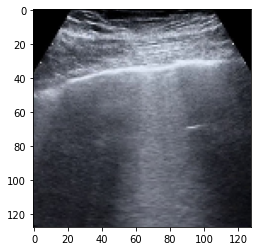

In [28]:
plt.imshow(next(d))

In [29]:
data = tf.data.Dataset.from_generator(gen,output_types=tf.float32).batch(8)

In [30]:
class Monitor(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        clear_output(wait=False)
        z = tf.random.normal((5,64))
        images = self.model.generator(z,training=False)
        fig,axs = plt.subplots(1,5,figsize=(15,10))
        for i,ax in enumerate(axs.flat):
            ax.imshow(images[i])
        plt.show()
        
        

In [31]:
model = GAN_ADA()
model.compile(generator_optimizer=keras.optimizers.Adam(0.000001, beta_1),
    discriminator_optimizer=keras.optimizers.Adam(0.00001, beta_1))

In [41]:
tb_callback=tf.keras.callbacks.TensorBoard(
    log_dir='logs_new1', update_freq='epoch',)


checkpoint_path = "training_new1/cp.ckpt"

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model.load_weights("training_new1/cp.ckpt")


2022-02-15 09:51:28.624350: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-15 09:51:28.624404: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-15 09:51:28.624534: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-02-15 09:51:28.624566: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


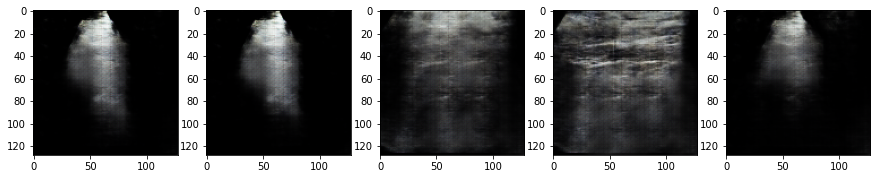

2022-02-15 09:51:49.055873: W tensorflow/core/framework/op_kernel.cc:1763] OP_REQUIRES failed at save_restore_v2_ops.cc:205 : Not found: Key optimizer/decay/.ATTRIBUTES/VARIABLE_VALUE not found in checkpoint


NotFoundError: Key optimizer/decay/.ATTRIBUTES/VARIABLE_VALUE not found in checkpoint [Op:RestoreV2]

In [42]:
monitor=Monitor()
model.fit(data,
         epochs=100000,
         callbacks=[monitor,tb_callback],
         )

In [ ]:
!nvidia-smi

In [ ]:
z = tf.random.normal((5,64))
images = model.generator(z,training=False)
fig,axs = plt.subplots(1,5,figsize=(15,10))
for i,ax in enumerate(axs.flat):
    ax.imshow(images[i])
plt.show()